In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weeds-detection/dataset/classes.txt
/kaggle/input/weeds-detection/dataset/labels/val/agri_0_8733.txt
/kaggle/input/weeds-detection/dataset/labels/val/agri_0_6120.txt
/kaggle/input/weeds-detection/dataset/labels/val/agri_0_3928.txt
/kaggle/input/weeds-detection/dataset/labels/val/agri_0_1258.txt
/kaggle/input/weeds-detection/dataset/labels/val/agri_0_9612.txt
/kaggle/input/weeds-detection/dataset/labels/val/agri_0_4499.txt
/kaggle/input/weeds-detection/dataset/labels/val/agri_0_1841.txt
/kaggle/input/weeds-detection/dataset/labels/val/agri_0_4419.txt
/kaggle/input/weeds-detection/dataset/labels/val/agri_0_2876.txt
/kaggle/input/weeds-detection/dataset/labels/val/agri_0_1129.txt
/kaggle/input/weeds-detection/dataset/labels/val/agri_0_3378.txt
/kaggle/input/weeds-detection/dataset/labels/val/agri_0_3828.txt
/kaggle/input/weeds-detection/dataset/labels/val/agri_0_2654.txt
/kaggle/input/weeds-detection/dataset/labels/val/agri_0_2901.txt
/kaggle/input/weeds-detection/dataset/la

In [1]:
import os 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

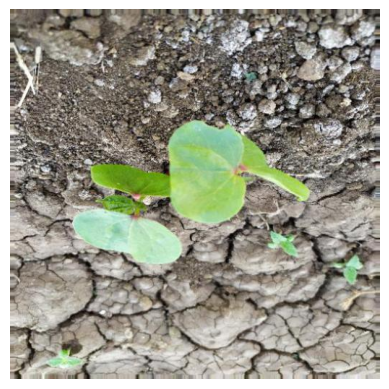

Image size: (512, 512)


In [2]:
image_dir= '/kaggle/input/weeds-detection/dataset/images/train/'
sample_image_path= os.path.join(image_dir, os.listdir(image_dir)[0])
img= Image.open(sample_image_path)
plt.imshow(img)
plt.axis('off') 
plt.show()
print("Image size:", img.size)

In [3]:
label_dir= '/kaggle/input/weeds-detection/dataset/labels/train/'

sample_label_path= os.path.join(label_dir, os.listdir(label_dir)[0])  
with open(sample_label_path, 'r') as f:
    label_data = f.read()
    print("Sample label data:", label_data)


Sample label data: 0 0.500977 0.609375 0.939453 0.433594



In [8]:
import shutil

def resize_images(image_folder, target_folder, target_size=(416, 416)):
    # create target folder if it doesn't exist
    os.makedirs(target_folder, exist_ok=True)
    
    for image_name in os.listdir(image_folder):
        if image_name.endswith('.jpg') or image_name.endswith('.jpeg') or image_name.endswith('.png'):
            img_path= os.path.join(image_folder, image_name)
            target_img_path= os.path.join(target_folder, image_name)

            # open the image, resize, and save it in the new folder
            img = Image.open(img_path)
            img_resized= img.resize(target_size)
            img_resized.save(target_img_path)

target_dir= '/kaggle/working/resized_images/train/'
resize_images(image_dir, target_dir)

In [5]:
def normalize_images(image_folder, target_folder):
    os.makedirs(target_folder, exist_ok=True)

    for image_name in os.listdir(image_folder):
        if image_name.endswith('.jpg') or image_name.endswith('.jpeg') or image_name.endswith('.png'):
            img_path = os.path.join(image_folder, image_name)
            target_img_path = os.path.join(target_folder, image_name)

            img = Image.open(img_path)
            img_array = np.array(img) / 255.0  # normalize the pixel values in range [0,1]
            img_normalized = Image.fromarray((img_array * 255).astype(np.uint8))  # back to uint8
            img_normalized.save(target_img_path)
            
normalized_dir= '/kaggle/working/normalized_images/train/'
normalize_images(target_dir, normalized_dir)

In [9]:
data_yaml = """
train: /kaggle/working/resized_images/train/
val: /kaggle/input/weeds-detection/dataset/images/val/
test: /kaggle/input/weeds-detection/dataset/images/test
nc: 2
names: ['crop', 'weed']
"""

with open('/kaggle/working/custom_data.yaml', 'w') as f:
    f.write(data_yaml)

In [6]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

In [10]:
from ultralytics import YOLO

model= YOLO('yolov8n.pt')  # Load a pre-trained YOLOv8 nano model
model.train(data='custom_data.yaml', epochs=50, imgsz=416)
metrics = model.val() 
path = model.export(format="onnx") 

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=custom_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, prof

train: Scanning /kaggle/working/resized_images/train... 0 images, 1245 backgrounds, 0 corrupt: 100%|██████████| 1245/1245 [00:00<00:00, 2759.19it/s]

WARNING ⚠️ train: No labels found in /kaggle/working/resized_images/train.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
train: New cache created: /kaggle/working/resized_images/train.cache
WARNING ⚠️ Labels are missing or empty in /kaggle/working/resized_images/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 90.9±40.3 MB/s, size: 56.0 KB)


val: Scanning /kaggle/input/weeds-detection/dataset/labels/val... 247 images, 0 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<00:00, 937.75it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/weeds-detection/dataset/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
WARNING ⚠️ zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.19G          0      43.21          0          0        416: 100%|██████████| 78/78 [00:07<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.17it/s]

                   all        247        382    0.00265      0.538    0.00964    0.00278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       1.2G          0      30.19          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.54it/s]

                   all        247        382    0.00344      0.266    0.00272   0.000777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.22G          0      19.25          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.50it/s]

                   all        247        382    0.00262      0.349    0.00193   0.000482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.24G          0      10.42          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]

                   all        247        382    0.00614     0.0515    0.00439    0.00101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.25G          0       4.69          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.60it/s]


                   all        247        382    0.00147    0.00233   0.000749   0.000374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.27G          0      1.863          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.23it/s]

                   all        247        382      0.156     0.0286     0.0793    0.00989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.29G          0     0.6408          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.93it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       1.3G          0     0.1987          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.44it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.32G          0    0.05145          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.19it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.34G          0    0.01689          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.80it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.36G          0    0.01402          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.59it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.37G          0   0.004158          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.94it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.39G          0     0.0026          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.57it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.41G          0   0.002609          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.83it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.43G          0   0.002569          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.49it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.44G          0   0.002313          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.09it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.46G          0   0.001286          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.88it/s]

                   all        247        382    0.00184    0.00233   0.000928   0.000464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.48G          0  0.0003927          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.68it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.49G          0  6.043e-05          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.94it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.51G          0  3.006e-05          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.51it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.53G          0  1.504e-06          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.15it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.54G          0  7.947e-07          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.38it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.56G          0  4.218e-07          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.70it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.58G          0  2.017e-07          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.92it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       1.6G          0  1.589e-07          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.55it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.61G          0  2.372e-06          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.39it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.63G          0  6.541e-07          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.20it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.65G          0  4.096e-07          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.20it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.66G          0  2.751e-07          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.07it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.68G          0  1.589e-07          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.84it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       1.7G          0  6.725e-08          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.70it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.71G          0  1.712e-07          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.96it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.73G          0  3.668e-08          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.81it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.75G          0  1.712e-07          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.29it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.77G          0  5.502e-08          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.67it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.78G          0  3.668e-08          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.84it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       1.8G          0  4.279e-08          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.42it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.82G          0  3.668e-08          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.06it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.83G          0  4.891e-08          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.76it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.85G          0  4.279e-08          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.52it/s]

                   all        247        382          0          0          0          0


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.87G          0  4.279e-08          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.17it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.88G          0  7.947e-08          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.25it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       1.9G          0  4.891e-08          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.38it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.92G          0  4.891e-08          0          0        416: 100%|██████████| 78/78 [00:06<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.17it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.94G          0  3.057e-08          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.74it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.95G          0  1.834e-08          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.58it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.97G          0  6.113e-08          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.60it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.99G          0  3.668e-08          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.93it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         2G          0  4.279e-08          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.24it/s]

                   all        247        382          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.02G          0  3.057e-08          0          0        416: 100%|██████████| 78/78 [00:05<00:00, 13.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.95it/s]

                   all        247        382          0          0          0          0



50 epochs completed in 0.099 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.49it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        247        382      0.127     0.0256     0.0649    0.00826
                  crop        118        215        0.2     0.0093      0.101     0.0101
                  weed        129        167     0.0538     0.0419     0.0284    0.00639
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 128.3±41.3 MB/s, size: 61.1 KB)


val: Scanning /kaggle/input/weeds-detection/dataset/labels/val... 247 images, 0 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<00:00, 985.59it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/weeds-detection/dataset/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  9.68it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        247        382      0.142     0.0286     0.0724    0.00919
                  crop        118        215      0.222     0.0093      0.113     0.0113
                  weed        129        167     0.0611     0.0479     0.0321    0.00712
Speed: 0.5ms preprocess, 2.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 6, 3549) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 11.6s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates

In [14]:
!yolo predict model='/kaggle/working/runs/detect/train2/weights/best.pt' \
    source='/kaggle/input/weeds-detection/dataset/images/val/agri_0_8797.jpeg' \
    conf=0.1


Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /kaggle/input/weeds-detection/dataset/images/val/agri_0_8797.jpeg: 416x416 (no detections), 87.5ms
Speed: 2.3ms preprocess, 87.5ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
